In [21]:
import statsmodels as sm
import warnings
warnings.filterwarnings('ignore')

In [104]:
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
#print(results.summary())

In [23]:
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [11]:
dat._get_numeric_data().corr().iplot(kind='heatmap', colorscale='greys')

In [22]:
df = dat[['Crime_prop','Suicides']]
df.sort_values(by='Crime_prop').set_index('Crime_prop').iplot(title='Suicides vs Crime Prop', bestfit=True)

### Regression tree by hand

In [37]:
df = df.sort_values(by='Crime_prop')

In [38]:
y = df['Suicides'].values
x = df['Crime_prop'].values

In [44]:
def mean_prediction(y):
    return y.mean()*np.ones_like(y)

In [40]:
def mse(y_pred, y):
    return np.square(y_pred - y).mean()

In [45]:
mse(mean_prediction(y), y)

969073832.2855598

#### Loss function for regression tree:
<font size='4.5'>
<center>
$loss = \frac{m_{\text{left}}}{m}\text{MSE}_{\text{left}}+\frac{m_{\text{right}}}{m}\text{MSE}_{\text{right}}$
</center>
</font>

In [43]:
def weighted_mse(y_pred, y, total):
    return y_pred.shape[0]/total*mse(y_pred,y)

In [55]:
def get_split_list(x,y):
    return [(x, weighted_mse(mean_prediction(y[i:]),y[i:],y.shape[0])+weighted_mse(mean_prediction(y[:i]),y[:i],y.shape[0])) for i, x in enumerate(x) if i!=0]

In [89]:
def get_best_split(split_list):
    return list(zip(*split_list))[0][list(zip(*split_list))[1].index(min(list(zip(*split_list))[1]))]

In [91]:
y_right = y[list(x).index(get_best_split(get_split_list(x,y))):]
y_left = y[:list(x).index(get_best_split(get_split_list(x,y)))]
x_right = x[list(x).index(get_best_split(get_split_list(x,y))):]
x_left = x[:list(x).index(get_best_split(get_split_list(x,y)))]

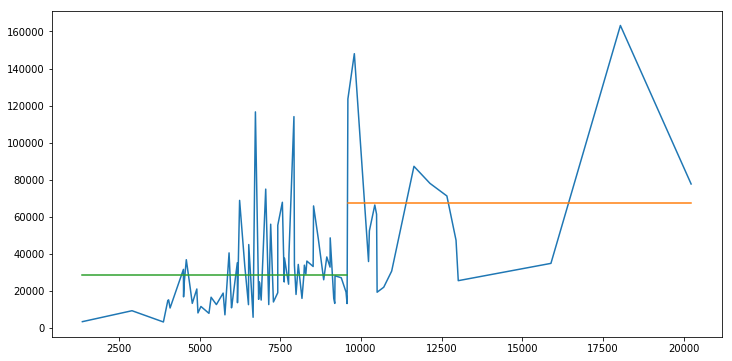

In [92]:
_ = plt.figure(figsize=(12,6))
_ = plt.plot(x, y)
#_ = plt.plot(x, mean_prediction(y))
_ = plt.plot(x_right, mean_prediction(y_right))
_ = plt.plot(x_left, mean_prediction(y_left))
plt.show()

In [95]:
y_right_right = y_right[list(x_right).index(get_best_split(get_split_list(x_right,y_right))):]
y_right_left = y_right[:list(x_right).index(get_best_split(get_split_list(x_right,y_right)))]
y_left_right = y_left[list(x_left).index(get_best_split(get_split_list(x_left,y_left))):]
y_left_left = y_left[:list(x_left).index(get_best_split(get_split_list(x_left,y_left)))]
x_right_right = x_right[list(x_right).index(get_best_split(get_split_list(x_right,y_right))):]
x_right_left = x_right[:list(x_right).index(get_best_split(get_split_list(x_right,y_right)))]
x_left_right = x_left[list(x_left).index(get_best_split(get_split_list(x_left,y_left))):]
x_left_left = x_left[:list(x_left).index(get_best_split(get_split_list(x_left,y_left)))]

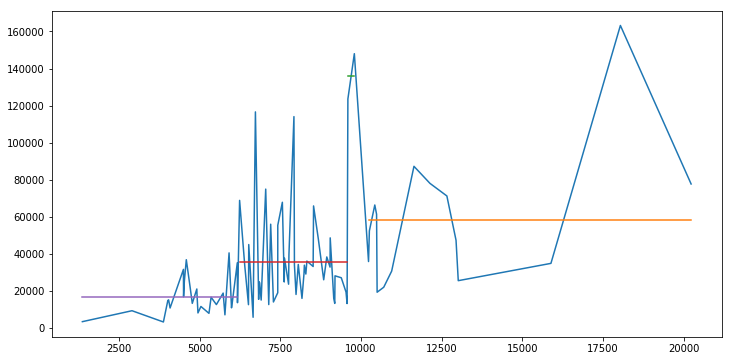

In [96]:
_ = plt.figure(figsize=(12,6))
_ = plt.plot(x, y)
#_ = plt.plot(x, mean_prediction(y))
_ = plt.plot(x_right_right, mean_prediction(y_right_right))
_ = plt.plot(x_right_left, mean_prediction(y_right_left))
_ = plt.plot(x_left_right, mean_prediction(y_left_right))
_ = plt.plot(x_left_left, mean_prediction(y_left_left))
plt.show()

In [102]:
y_tree = np.concatenate((mean_prediction(y_left_left),mean_prediction(y_left_right),mean_prediction(y_right_left),mean_prediction(y_right_right)))
df['tree'] = y_tree

In [103]:
df.set_index('Crime_prop').iplot(title='Tree', bestfit=True)

Classification trees work the same way, but instead of MSE, they use other cost functions, such entropy or gini index.